In [282]:
import pandas as pd
from sklearn.model_selection import train_test_split #트레인, 테스트 데이터 분류 
from sklearn.svm import SVC #SVC 서포트 벡터 머신 라이브러리(분류화)
from sklearn.metrics import accuracy_score, classification_report  #metrics 는 confusion metrics 의 라이브러리 : accuracy/recall/precision 등 모델 평가
from sklearn.neighbors import KNeighborsClassifier #KNN 분류 라이브러리
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #앙상블 - 랜덤포레스트
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV #K폴드, 그리드서치 방법 임포트
%matplotlib inline 

In [283]:
bb = pd.read_csv("basketball_stat (1).csv")

In [284]:
bb

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [285]:
import seaborn as sns

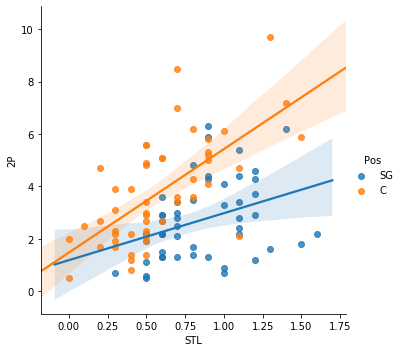

In [286]:
sns.lmplot(x='STL',y='2P',hue='Pos', data=bb)

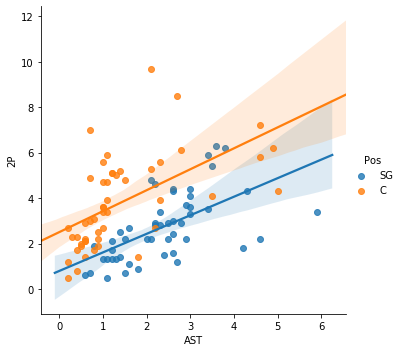

In [287]:
sns.lmplot(x='AST',y='2P',hue='Pos', data=bb)

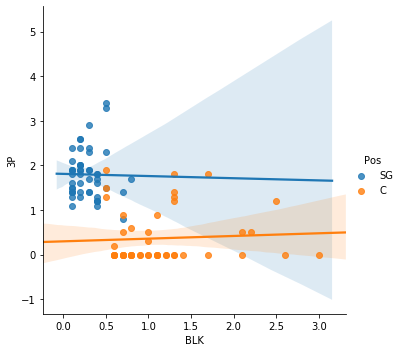

In [288]:
sns.lmplot(x='BLK',y='3P',hue='Pos', data=bb)

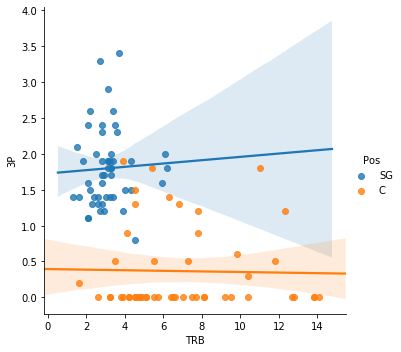

In [289]:
sns.lmplot(x='TRB',y='3P',hue='Pos', data=bb)

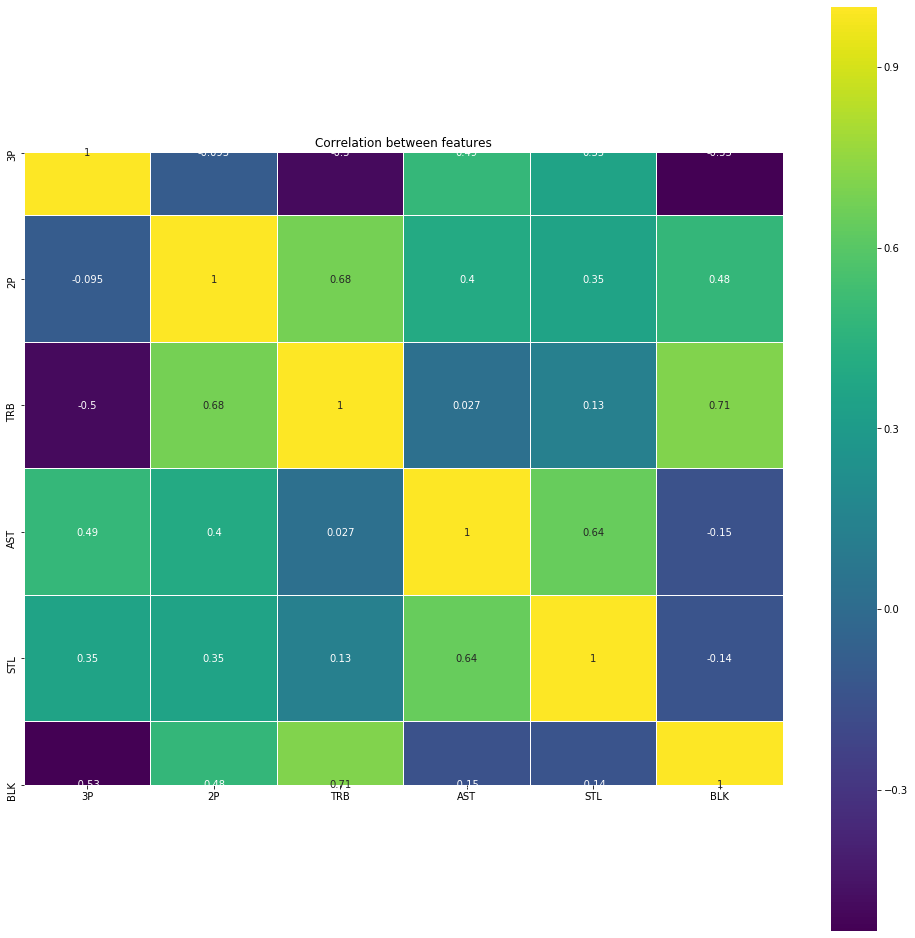

In [290]:
#히트맵 -> 상관도 시각화

plt.figure(figsize=(17, 17))
sns.heatmap(bb.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [291]:
#운알못..
#2. 드랍까지 완료
y = bb.loc[:,'Pos']
x = bb.loc[:, ['3P','BLK','TRB']]

#3점슛, 블로킹, 리바운드 / 

In [292]:
x

,3P,BLK,TRB
0,1.4,0.1,1.3
1,0.0,1.0,7.7
2,0.0,0.6,4.5
3,0.0,0.6,2.6
4,1.5,0.5,4.3
...,...,...,...
95,0.3,1.0,10.4
96,0.8,0.7,4.5
97,1.8,0.4,3.3
98,0.0,2.1,14.1


In [293]:
y

0     SG
1      C
2      C
3      C
4     SG
      ..
95     C
96    SG
97    SG
98     C
99    SG
Name: Pos, Length: 100, dtype: object

In [294]:
y.values

array(['SG', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C',
       'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C',
       'C', 'C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG',
       'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'C', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'SG', 'C',
       'SG', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'C', 'C', 'SG', 'C',
       'SG', 'SG', 'C', 'SG'], dtype=object)

In [380]:
#3. 트레인하고 테스트 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0, test_size=0.3)

In [381]:
svc = SVC() #SVC 모델

In [382]:
knn = KNeighborsClassifier(n_neighbors=3) #KNN 모델

In [383]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=13) #Decsion Tree

In [384]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456) #랜덤포레스트

In [385]:
from sklearn.model_selection import cross_val_score #모델 정확도 평가 라이브러리

In [386]:
#K-fold 를 만들어보자
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # n_splits 는 데이터 분할 수 입니다. 전체 데이터 수를 넘을 수 없습니다.

In [387]:
scores = cross_val_score(svc, x_train, y_train, cv=kfold) #

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [388]:
scores

array([1.        , 0.92857143, 0.78571429, 1.        , 1.        ])

In [389]:
scores.mean() #SVC 모델의 정확도 평균

0.9428571428571428

In [390]:
scores2 = cross_val_score(knn, x_train, y_train, cv=kfold) #knn 머신러닝 방법 정확도


In [391]:
scores2

array([0.92857143, 0.92857143, 0.71428571, 1.        , 1.        ])

In [392]:
scores2.mean() #KNN 모델의 정확도 평균

0.9142857142857143

In [393]:
scores3 = cross_val_score(tree_clf, x_train, y_train, cv=kfold) #
scores3


array([0.92857143, 0.85714286, 0.71428571, 1.        , 0.92857143])

In [394]:
scores3.mean() #tree_clf 모델의 정확도 평균

0.8857142857142858

In [395]:
scores4 = cross_val_score(rf, x_train, y_train, cv=kfold) #

In [396]:
scores4.mean() #rf 모델의 정확도 평균

0.9285714285714286

In [397]:
#5. Grid-Search를 통해 SVC 모델 하이퍼 파라미터 최적 값 -> 훈련

In [398]:
values = [0.0001, 0.01, 0.1, 1, 10, 100] #c, gamma 를 하이퍼 파라미터로 조정 할 예정, values(list) 만큼

In [399]:
#RBF 또는 Linear 
#RBF 방법과 Linear 방법 둘 다 씀, Kernel 은 프로그래밍의 핵심!, C와 Gamma 에 Values 의 리스트를 넣어, 6x6 방식만큼 경우의 수로 
#트레인 데이터 샘플을 나누어 학습하겠다.

param_grid = [
    {'kernel' : ['rbf'], 'C':values, 'gamma' : values},
    {'kernel' : ['linear'], 'C': values }
]

In [400]:
grid_search = GridSearchCV(svc, param_grid, cv=kfold) #cv= Cross_validation는 K-Fold 방식(데이터를 분할한것)

In [401]:
grid_search.fit(x_train, y_train) #트레인 데이터를 넣어 '파라미터' 를 찾는다

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [402]:
grid_search.best_params_ #그리드 서치 방법중 BEST Parameter(=최적화) 는 무엇인데?

{'C': 10, 'kernel': 'linear'}

In [403]:
grid_search.best_score_ #정답률은 94%

0.9571428571428572

In [404]:
grid_search.score(x_test, y_test) #테스트 데이터로 검증해봤을땐 정답률이 96%

0.9666666666666667

In [405]:
#6. Accuracy를 구하고, Report 만들기

In [419]:
clf = GridSearchCV(svc, param_grid, n_jobs= -1)
clf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [420]:
clf.fit(x_train, y_train) #테스트

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [421]:
y_pred = clf.predict(x_test) #x_test로 검증 -> y_pred = 정답률 계산

In [422]:
y_pred

array(['SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'SG',
       'C', 'SG', 'SG', 'SG', 'SG'], dtype=object)

In [423]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [424]:
#6. classfication Report
from sklearn.metrics import classification_report

In [412]:
#6 F1-Score를 구함
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.80      1.00      0.89        16
          SG       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.90      0.86      0.86        30
weighted avg       0.89      0.87      0.86        30



In [413]:
#7. 위에까지 7번완료.

In [425]:
#8. 결과 : 1. 피처 : 3점슛,블로킹,리바운드 / 학습 정답률 : 96% / 테스트 정답률 : 86%
#8-1 결과 : 2. 피처 : 3점슛,2점슛,블로킹 /  학습 정답률 : 94 % / 테스트 정답률 : 96%
#8-2  결과 : 3. 피처 : 3점슛, 블로킹 / 학습 정답률 : 95% / 테스트 정답률 : 96%
#인사이트 : 트레인 데이터를 넣은 모델에서 높은 정답률이 나왔다고 하더라도, 테스트 데이터를 넣은 정답률이 높지는 않음을 알 수 있다.
#인사이트 : 피처로 리바운드로 학습시켰을 때, 학습과 테스트 정답률의 차이는 10% 가량을 보인다. 
#궁금증 : test_size : 0.7 로 하고, n_split 을 4로 하였을때는 학습과 테스트 정답률이 거의 비슷하다. 무슨 차이일까..?